In [1]:
import helpers.api_wrapper as DYapi
import pandas as pd

def queryAll(pageNumber):
    
    query = """
        {
            rekts(
                pageNumber:%d
                pageSize:50
                orderBy: {
                    fundsLost: desc
                }
            ){
                id
                projectName
                description
                date
                fundsLost
                fundsReturned
                chaindIds
                category
                issueType
            }
        }
    """
    
    
    return query % (pageNumber)

In [2]:
##loop through the API to collect all exploits

dataReturned = True
pageNumber = 1
exploits = []

while dataReturned:
    
    query = queryAll(pageNumber)
    data = DYapi.runQuery(query)
    
    if len(data['data']['rekts'])>0:
        #if data is returned, append to main list and increment pageNumber
        exploits.extend(data['data']['rekts'])
        pageNumber += 1
    else:
        #else end loop
        dataReturned = False
        
#load the data in a pandas data frame

df_exploits = pd.DataFrame(exploits)

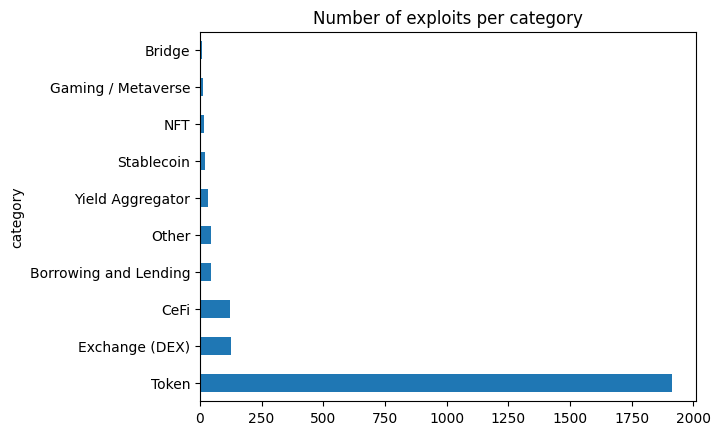

In [4]:
categoryRiskNo = df_exploits.groupby('category')['id'].count().sort_values(ascending=False).head(10).plot.barh(x='category',y='id', rot = 0, title = 'Number of exploits per category')

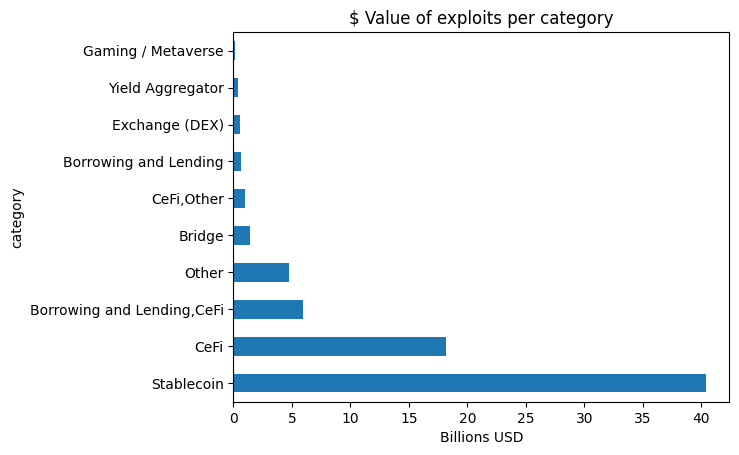

In [5]:
df_exploits['fundsLostBillions'] = df_exploits['fundsLost'].astype(float)/1E9
categoryRiskValue = df_exploits.groupby('category')['fundsLostBillions'].sum().sort_values(ascending=False).head(10).plot.barh(x='category',y='id', xlabel='Billions USD', rot = 0, title = '$ Value of exploits per category')

# Heatmap matrices
Heatmaps allow us to quickly visualize the most prominent issues within each category:
* Occurence-based: which are the category-issues combinations where the most exploits happen
* Value-based: which are the category-issues combinations where the highest value (in USD) was lost

In [6]:
## heatmaps
adjacency_matrix_occurences = pd.crosstab(df_exploits.category, df_exploits.issueType)
adjacency_matrix_usd = pd.crosstab(df_exploits.category, df_exploits.issueType, values=df_exploits.fundsLostBillions, aggfunc=sum)

## Occurence heatmap

In [7]:
adjacency_matrix_occurences.style.background_gradient(axis = None, cmap='Reds')

issueType,Abandoned,Access Control,Flash Loan Attack,Honeypot,Oracle Issue,Other,Phishing,Reentrancy,Rugpull
category,,,,,,,,,
Borrowing and Lending,0,3,6,12,4,15,0,1,6
"Borrowing and Lending,CeFi",0,0,0,0,0,2,0,0,1
"Borrowing and Lending,Exchange (DEX)",0,0,1,1,0,3,0,0,0
"Borrowing and Lending,Exchange (DEX),Stablecoin",0,0,0,0,1,0,0,0,0
"Borrowing and Lending,NFT",0,0,0,0,1,0,0,1,0
"Borrowing and Lending,Other",0,0,0,0,1,1,0,0,0
"Borrowing and Lending,Stablecoin",0,0,0,1,1,0,0,0,0
Bridge,0,3,0,0,0,7,0,0,0
"Bridge,Exchange (DEX)",0,1,0,0,0,0,0,0,0


## Value Heatmap

In [8]:
adjacency_matrix_usd.fillna(0).style.background_gradient(axis = None, cmap='Reds')

issueType,Abandoned,Access Control,Flash Loan Attack,Honeypot,Oracle Issue,Other,Phishing,Reentrancy,Rugpull
category,,,,,,,,,
Borrowing and Lending,0.000000,0.107212,0.019180,0.000000,0.181760,0.282067,0.000000,0.079749,0.008476
"Borrowing and Lending,CeFi",0.000000,0.000000,0.000000,0.000000,0.000000,3.990000,0.000000,0.000000,2.000000
"Borrowing and Lending,Exchange (DEX)",0.000000,0.000000,0.130000,0.000000,0.000000,0.004072,0.000000,0.000000,0.000000
"Borrowing and Lending,Exchange (DEX),Stablecoin",0.000000,0.000000,0.000000,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000
"Borrowing and Lending,NFT",0.000000,0.000000,0.000000,0.000000,0.001115,0.000000,0.000000,0.001430,0.000000
"Borrowing and Lending,Other",0.000000,0.000000,0.000000,0.000000,0.002000,0.090000,0.000000,0.000000,0.000000
"Borrowing and Lending,Stablecoin",0.000000,0.000000,0.000000,0.000000,0.035000,0.000000,0.000000,0.000000,0.000000
Bridge,0.000000,0.726166,0.000000,0.000000,0.000000,0.684739,0.000000,0.000000,0.000000
"Bridge,Exchange (DEX)",0.000000,0.000080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot: xlabel='date_month'>

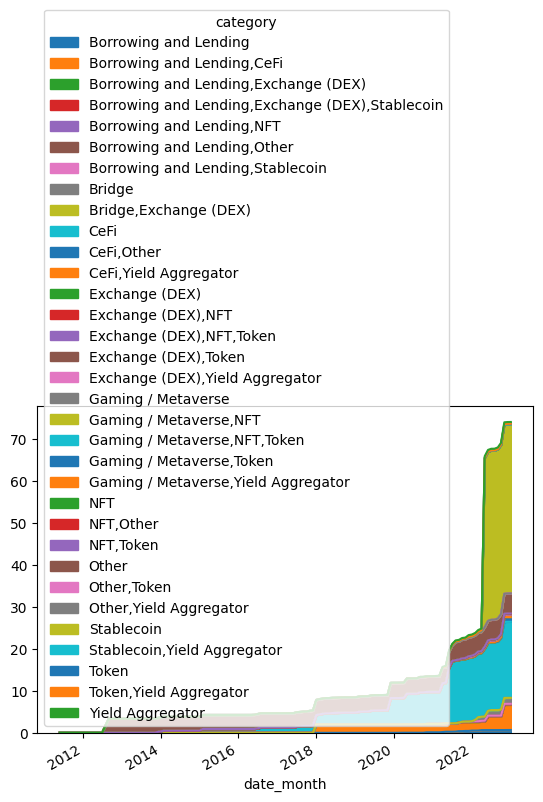

In [9]:
#Time series
df_exploits['date_month'] = pd.to_datetime(df_exploits['date']) + pd.offsets.MonthBegin(-1)

#df_exploits.groupby(['date_month','category'])['fundsLostBillions'].sum().sort_values('date_month').plot.area(x = 'date_month', y = 'fundsLostBillions', stacked = True)

timeseries_category = pd.crosstab(
    df_exploits.date_month,
    df_exploits.category,
    values=df_exploits.fundsLostBillions,
    aggfunc=sum
).fillna(0).cumsum()#.reset_index(level = ['category'])

timeseries_category.plot.area(stacked = True)

In [10]:
"items":[
        {
            "id":3058,
            "project_name":"Terra Classic",
            "description":"<p><strong>Quick Summary</strong></p><p>A complex mixture of events and market dynamics cost the implosion of the $40b Terra (Classic) Network.&nbsp;</p><p><br></p><p><strong>Details of the Exploit</strong></p><p>The Terra Luna Network was focused on its two native coins $LUNC and $USTC. $USTC was the algorithmic Stablecoin that was supposed to hold the peg to 1$ and $LUNC functioned as the satellite asset that absorbed $USTC’s volatility. This was achieved through a mint and burn functionality as well as by arbitrage which the former function inherently enabled.</p><p><br></p><p>$USTC rose to prominence in rapid fashion even surpassing $DAI in market cap. The Luna Foundation Group decided to start a new Curve4pool with $FRAX, $USTC, $USDC and $USDT as assets, excluding $DAI in an attempt to starve the most used StableCoin pool used by institutions the Curve3pool on the Ethereum network.</p><p><br></p><p>The migration of $USTC from the Curve3pool is the event that started the bankrun. In early May, the Luna Foundation Guard withdrew 250 million $USTC from the Curve3pool in preparation for the Curve4pool. Simultaneously, a handful of whales withdrew sizeable amounts from the anchor protocol, a crypto savings bank. The biggest wallet withdrew 347 million $USTC in total and bridged funds to the Curve3pool in order to swap for other assets. This movement of funds created an imbalance between $USTC and other Stablecoins in the pool, resulting in devaluation of $USTC on exchanges.</p><p><br></p><p>As a result of the tokenomics of $USTC and $LUNC the firesale of $USTC resulted in uncontrollable minting of the $LUNC token and a rapid fall in valuation. Additionally, the Terra network went down due to overload in transaction as market participants were panicking and trying to answer margin calls within the Anchor protocol. Eventually massive liquidations of collateral in the Anchor protocol would be incurred by investors.</p><p><br></p><p><strong>Block Data Reference</strong></p><p>Whale Addresses:</p><p>https://etherscan.io/address/0x8d47f08ebc5554504742f547eb721a43d4947d0a</p><p>https://etherscan.io/address/0x4b5e60cb1cd6c5e67af5e6cf63229d1614bb781c</p><p>https://etherscan.io/address/0x1df8ea15bb725e110118f031e8e71b91abaa2a06</p><p>https://etherscan.io/address/0xeb5425e650b04e49e5e8b62fbf1c3f60df01f232</p><p>https://etherscan.io/address/0x41339d9825963515e5705df8d3b0ea98105ebb1c</p><p>https://etherscan.io/address/0x68963dc7c28a36fcacb0b39ac2d807b0329b9c69</p><p>https://etherscan.io/address/0x9f705ff1da72ed334f0e80f90aae5644f5cd7784</p>",
            "name_categories":"Stablecoin",
            "token_name":"LUNC,USTC",
            "proof_archive_link":"https://twitter.com/OnChainWizard/status/1524123935570382851, https://rekt.news/ru/luna-rekt/, https://mobile.twitter.com/hasufl/status/1523817151471230976",
            "technical_issue":null,
            "token_address":"0x7e43d25EaD96B1058f671F6690ea705BA2C7e5B9, 0xa47c8bf37f92abed4a126bda807a7b7498661acd",
            "token_addresses":[],
            "logo_link":"safe/files/scamDatabase/logo/62b31ccc0d07e.jpeg",
            "date":"2022-5-8",
            "scam_updates":[],
            "proof_link":"https://www.nansen.ai/research/on-chain-forensics-demystifying-terrausd-de-peg?utm_source=twitter&utm_medium=organic&utm_campaign=Research_USTdepeg_27May22, https://www.cnet.com/personal-finance/crypto/luna-crypto-crash-how-ust-broke-and-whats-next-for-terra/, https://www.fool.com/the-ascent/cryptocurrency/articles/binance-ceo-says-luna-collapse-left-him-poor-again/#:~:text=Key%20points,and%20make%20a%20new%20plan., https://medium.com/coinmonks/whats-happening-with-the-terra-luna-seed-money-exit",
            "website_link":"https://www.terra.money/",
            "webarchive_link":null,
            "twitter_link":"https://twitter.com/terra_money",
            "telegram_link":"https://t.me/TerraNetworkLobby",
            "our_post_link":null,
            "funds_lost":40000000000,
            "funds_returned":0,
            "funds_by_chains":[],
            "funds_recovered":null,
            "active":1,
            "git_hub":"https://github.com/terra-money/",
            "git_hub_contract_link":null,
            "discord":"https://twitter.com/terra_money",
            "bug_bounty_program_link":null,
            "bug_bounty_program_company":null,
            "audit_code_conf":0,
            "is_verified_source_code":0,
            "is_public_team":1,
            "scam_type":{"id":19,"type":"Other"},
            "network":{},
            "scamNetworks":[
                {"networks_id":1003,
                 "scam_database_id":3058,
                 "networks":{
                     "id":1003,
                     "name":"Terra Classic",
                     "icon_link":"safe/files/network/terra-classic.png"
                 }
                }
            ],
            "auditedBy":[
                {"audit_link":"safe/files/audit/pdf/CertiK_Audit_for_Terra_v18.pdf",
                 "date":"2020-09-03T00:00:00.000Z",
                 "partner":{
                     "id":8,
                     "name":"Certik",
                     "logo_link":"safe/files/partner/logo/609520cbb1bba.png"
                 }
                }
            ]
        }
    ]

SyntaxError: illegal target for annotation (2146742651.py, line 1)

In [ ]:
pip install matplotlib